In [1]:
import pandas as pd

In [2]:
sesh=pd.read_csv('Sessions.csv')

In [3]:
sesh.head()

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN


In [4]:
book=pd.read_csv('Bookings.csv')

In [5]:
book.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4


In [6]:
date=pd.to_datetime(book.booking_time)
date

0     2020-02-05 16:12:08+00:00
1     2018-11-21 08:21:47+00:00
2     2019-12-16 22:54:58+00:00
3     2021-10-29 12:25:38+00:00
4     2020-08-11 16:09:10+00:00
                 ...           
334   2020-02-14 14:20:20+00:00
335   2020-03-21 06:40:56+00:00
336   2020-01-31 20:35:35+00:00
337   2018-10-11 14:31:28+00:00
338   2022-07-11 18:46:59+00:00
Name: booking_time, Length: 339, dtype: datetime64[ns, UTC]

In [7]:
day_of_week=date.dt.dayofweek
day_of_week

0      2
1      2
2      0
3      4
4      1
      ..
334    4
335    5
336    4
337    3
338    0
Name: booking_time, Length: 339, dtype: int64

 1) Find the number of distinct bookings,sessions, and searches from the given datasets.

In [8]:
num_bookings=book.booking_id.nunique()
num_bookings

339

In [9]:
num_sessions=sesh.session_id.nunique()
num_sessions

331

In [10]:
num_searches=sesh.search_id.nunique()
num_searches

1360

2)How many sessions have more than 1 booking 

In [11]:
num_unique_bookings=sesh.groupby('session_id')['booking_id'].nunique()
num_unique_bookings

session_id
session_0      1
session_1      1
session_10     1
session_100    1
session_101    1
              ..
session_95     1
session_96     1
session_97     1
session_98     1
session_99     1
Name: booking_id, Length: 331, dtype: int64

In [12]:
sesh_multiple_bookings=num_unique_bookings[num_unique_bookings>1]
print(sesh_multiple_bookings)

session_id
session_134    2
session_154    2
session_196    2
session_231    2
session_27     2
session_290    2
session_298    2
session_324    2
session_50     2
session_76     2
Name: booking_id, dtype: int64


In [13]:
total_sesh_with_multiple=len(sesh_multiple_bookings)
print('The total number of sessions having more than 1 bookings are:',total_sesh_with_multiple)

The total number of sessions having more than 1 bookings are: 10


3)Which days of the week have the highest number of bookings?Also draw a pie chart to show the 
distribution for all days of the week.

In [14]:
import matplotlib.pyplot as plt
new_data = pd.read_csv('Bookings.csv')
bookings_df1 = new_data
bookings_df1.booking_time = pd.to_datetime(bookings_df1.booking_time)
bookings_df1['booking_day']=bookings_df1.booking_time.apply(lambda x:x.day_name())
booking_day_summary = bookings_df1.booking_day.value_counts()
booking_day_summary = booking_day_summary.to_csv("booking_day_summary.csv")
bkg_day=pd.read_csv('booking_day_summary.csv')
weekday=bkg_day['booking_day']
print(f"Day with highest bookings: {weekday[0]}")

plt.pie(weekday_summary,labels=weekday,startangle=90,autopct='%.1f%%')
plt.title("bookings_summary_daywise")
plt.show()


Day with highest bookings: 65


NameError: name 'weekday_summary' is not defined

In [16]:
service_booking_counts = book.groupby('service_name')['booking_id'].count()

gross_booking_value = book.groupby('service_name')['INR_Amount'].sum()


Bookings_df = pd.DataFrame({
    'Total Bookings for each service': service_booking_counts,
    'Total Gross Booking Value (Rupees)': gross_booking_value
})

print(Bookings_df)

              Total Bookings for each service  \
service_name                                    
GOIBIBO                                   186   
MMT                                        48   
YATRA                                     105   

              Total Gross Booking Value (Rupees)  
service_name                                      
GOIBIBO                               5897637.97  
MMT                                    665669.08  
YATRA                                 3378702.13  


5)For customers who have more than 1 booking, which is the most booked route(from_cityto to_city)?

In [17]:
unique_bookings=book.groupby('customer_id')['booking_id'].count()
multiple_bookings=unique_bookings[unique_bookings>1]

# Get the bookings for multi-booking customers
multi_booking_data = book[book['customer_id'].isin(multiple_bookings.index)]

# Group by route (from_city to to_city) and count bookings
route_counts = multi_booking_data.groupby(['from_city', 'to_city'])['booking_id'].count()
route_counts

# Find the most booked route
most_booked_route = route_counts.idxmax()

print(f"Most booked route: {most_booked_route}")

Most booked route: ('Gurgaon', 'Roissy-en-France')


6. Which are the top 3 departure cities from where customers book
mostly in advance, provided that there have been atleast 5 departures
from that city?

In [18]:
no_of_departures = book.groupby('from_city')['booking_id'].count()

# Filter cities with at least 5 departures
top_departures = no_of_departures[no_of_departures >= 5]

# Sort by departure count in ascending order
sorted_departures = top_departures.sort_values(ascending=False)

# Get the top 3 departure cities
top_3_cities = sorted_departures.index[:3]

print(f"Top 3 departure cities for advance bookings: {', '.join(top_3_cities)}")

Top 3 departure cities for advance bookings: Gurgaon, Mumbai, Delhi


7. Plot a heatmap displaying correlations of the numerical column 
and report which pair of numerical columns in the bookings dataset,
have the maximum correlation?

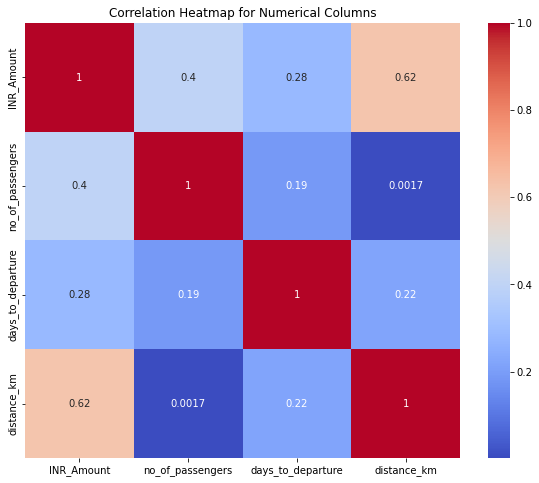

The pair of numerical columns with the maximum correlation is: ('INR_Amount', 'INR_Amount')


In [20]:
import seaborn as sns

# Select only numerical columns for correlation
numerical_columns = book.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

# Find the pair of columns with maximum correlation
max_corr_pair = correlation_matrix.unstack().idxmax()
print(f"The pair of numerical columns with the maximum correlation is: {max_corr_pair}")

8. For each service, which is the most used device type for making
bookings on the platform?

In [21]:
device_counts = book.groupby('service_name')['device_type_used'].value_counts()

# Get the most used device type for each service
most_used_devices = device_counts.groupby('service_name').idxmax()

print("Most used device type for each service:")
for service, device in most_used_devices.items():
    print(f"{service}: {device[1]}")

Most used device type for each service:
GOIBIBO: IOS
MMT: Desktop
YATRA: Desktop


9. Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type.

<function matplotlib.pyplot.show(close=None, block=None)>

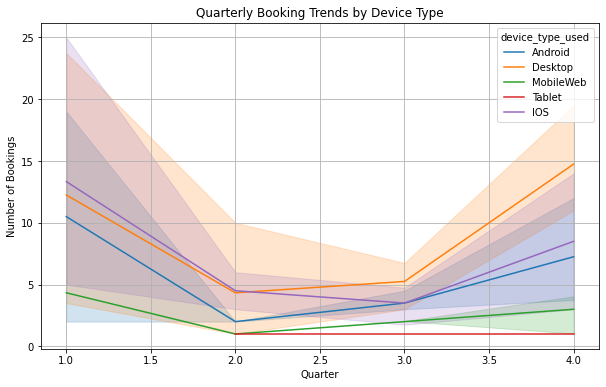

In [27]:
# Convert booking_time to datetime
import pandas as pd
book['booking_time'] = pd.to_datetime(book['booking_time'])

# Extract year and quarter
book['year'] = book['booking_time'].dt.year
book['quarter'] = book['booking_time'].dt.quarter

# Group by year, quarter, and device type
booking_counts = book.groupby(['year', 'quarter', 'device_type_used']).size().reset_index(name='count')

# Create time series plots
plt.figure(figsize=(10, 6))
sns.lineplot(x='quarter', y='count', hue='device_type_used', data=booking_counts)
plt.xlabel('Quarter')
plt.ylabel('Number of Bookings')
plt.title('Quarterly Booking Trends by Device Type')
plt.grid(True)
plt.show

10. Consider the following example:12 customers performed a total of 
    100 searches but only a few of them performed 10 bookings in 
    total. Searches = 100 bookings =10 customers= 12 The overall 
    booking to search ratio , Ober , is 10/100 = 0.1 Using the above
    information/context ,answer the following: •What is the average
    oBSR for each month of the year? •What is the average oBSR 
    for each day of the week? •Plot a time series of oBSR on all the 
    given dates.



In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the sessions.csv file (replace 'C:\\sessions.csv' with the actual file path)
data = pd.read_csv('Sessions.csv')

# Convert the 'search_time' column to datetime
data['search_time'] = pd.to_datetime(data['search_time'])

# Extract year and month
data['year'] = data['search_time'].dt.year
data['month'] = data['search_time'].dt.month

# Calculate the total searches and bookings
total_searches = data['search_id'].nunique()
total_bookings = data['booking_id'].nunique()
# Calculate the overall booking to search ratio (oBSR)
oBSR = total_bookings / total_searches

print(f"Overall booking to search ratio (oBSR): {oBSR:.2f}")

# Calculate the average oBSR for each month
average_oBSR_monthly = data.groupby(['year', 'month'])['booking_id'].nunique() / data.groupby(['year', 'month'])['search_id'].nunique()

print("Average oBSR for each month:")
print(average_oBSR_monthly)

# Calculate the average oBSR for each day of the week
data['day_of_week'] = data['search_time'].dt.dayofweek
average_oBSR_daily = data.groupby('day_of_week')['booking_id'].nunique() / data.groupby('day_of_week')['search_id'].nunique()

print("Average oBSR for each day of the week:")
print(average_oBSR_daily)

Overall booking to search ratio (oBSR): 0.25
Average oBSR for each month:
year  month
2018  9        0.387097
      10       0.095238
      11       0.243902
      12       0.193548
2019  1        0.333333
      6        1.000000
      7        0.217391
      8        0.285714
      9        0.304348
      10       0.214286
      11       0.285714
      12       0.219298
2020  1        0.226027
      2        0.306452
      3        0.300000
      5        0.111111
      6        0.333333
      7        0.100000
      8        0.666667
      9        0.375000
      10       0.545455
      11       0.407407
      12       0.666667
2021  1        0.571429
      2        0.363636
      3        0.312500
      4        0.258065
      5        0.500000
      6        0.428571
      7        0.117647
      8        0.210526
      9        0.521739
      10       0.300000
      11       0.147059
      12       0.300000
2022  1        0.350000
      2        0.275862
      3        0.179487
  

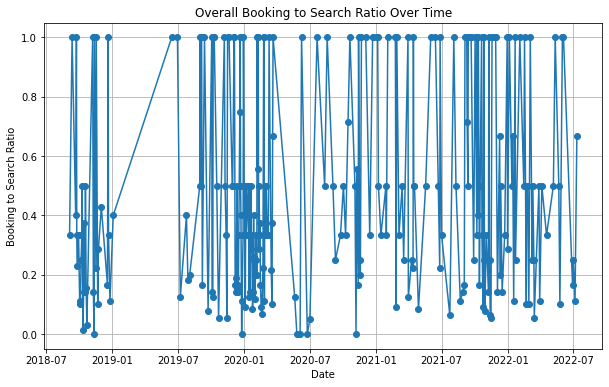

In [35]:
df = pd.read_csv('Sessions.csv')

# Convert the 'search_time' column to datetime
df['search_time'] = pd.to_datetime(df['search_time'])

# Extract the date from the 'search_time' column
df['search_date'] = df['search_time'].dt.date

# Calculate total bookings and total searches per day
daily_stats = df.groupby('search_date').agg({'booking_id': 'count', 'search_id': 'count'})

# Calculate the overall booking to search ratio
daily_stats['booking_to_search_ratio'] = daily_stats['booking_id'] / daily_stats['search_id']
# Step 2: Plot the time series graph
plt.figure(figsize=(10, 6))
plt.plot(daily_stats.index, daily_stats['booking_to_search_ratio'], marker='o')
plt.xlabel('Date')
plt.ylabel('Booking to Search Ratio')
plt.title('Overall Booking to Search Ratio Over Time')
plt.grid(True)
plt.show()